In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

# Load the dataset (assuming the dataset is in a CSV file named 'house_prices.csv')
# The dataset should have columns like 'location', 'size', 'rooms', 'age', and 'price'
df = pd.read_csv("C:\\Users\\tanis\\OneDrive\\Desktop\\OFFER LETTERS\\DATA SET USED FOR PROJECTS\\housing.csv")
df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.fillna(df.median(), inplace=True)


C:\Users\tanis\AppData\Local\Temp\ipykernel_11380\2553801490.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [40]:
df_dummies = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


In [41]:
df_combined = pd.concat([df, df_dummies], axis=1)


In [42]:
df_combined.drop('ocean_proximity', axis=1, inplace=True)


In [43]:
X = df_combined.drop(columns=['median_house_value'])
Y = df_combined['median_house_value']


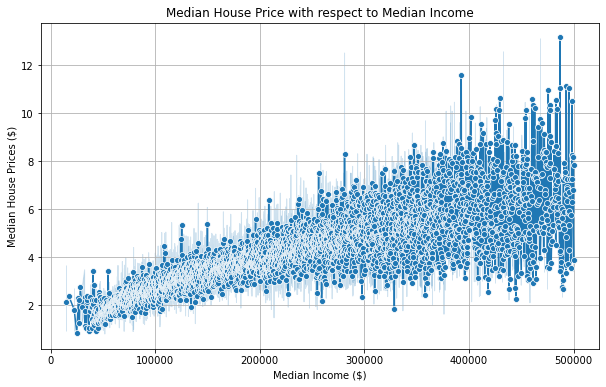

In [45]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = df['median_house_value'], y = df['median_income'], data=df_combined, marker='o')
plt.title('Median House Price with respect to Median Income')
plt.xlabel('Median Income ($)')
plt.ylabel('Median House Prices ($)')
plt.grid(True)
plt.show()

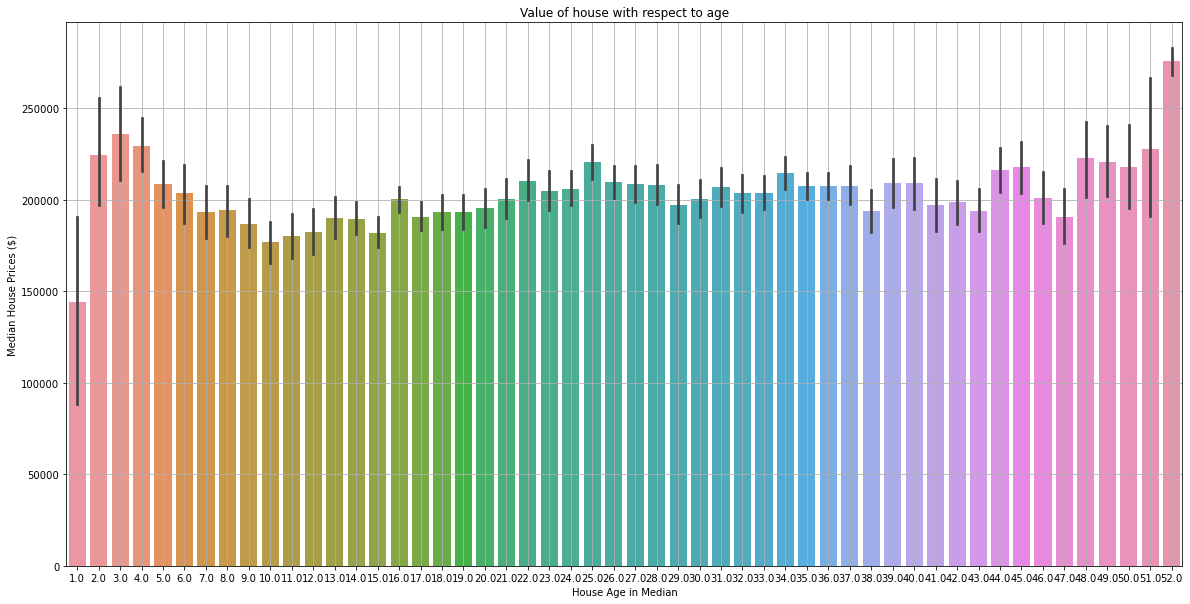

In [35]:
plt.figure(figsize=(20, 10))
sns.barplot(x = df['housing_median_age'], y = df['median_house_value'], data=df)
plt.title('Value of house with respect to age')
plt.xlabel('House Age in Median')
plt.ylabel('Median House Prices ($)')
plt.grid(True)
plt.show()

In [46]:
correlation_matrix = df_combined.corr()
print(correlation_matrix)


                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.044568 -0.036100           -0.361262   
total_bedrooms               0.069608 -0.066983           -0.320451   
population                   0.099773 -0.108785           -0.296244   
households                   0.055310 -0.071035           -0.302916   
median_income               -0.015176 -0.079809           -0.119034   
median_house_value          -0.045967 -0.144160            0.105623   
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.044568 -0.036100           -0.361262   
total_

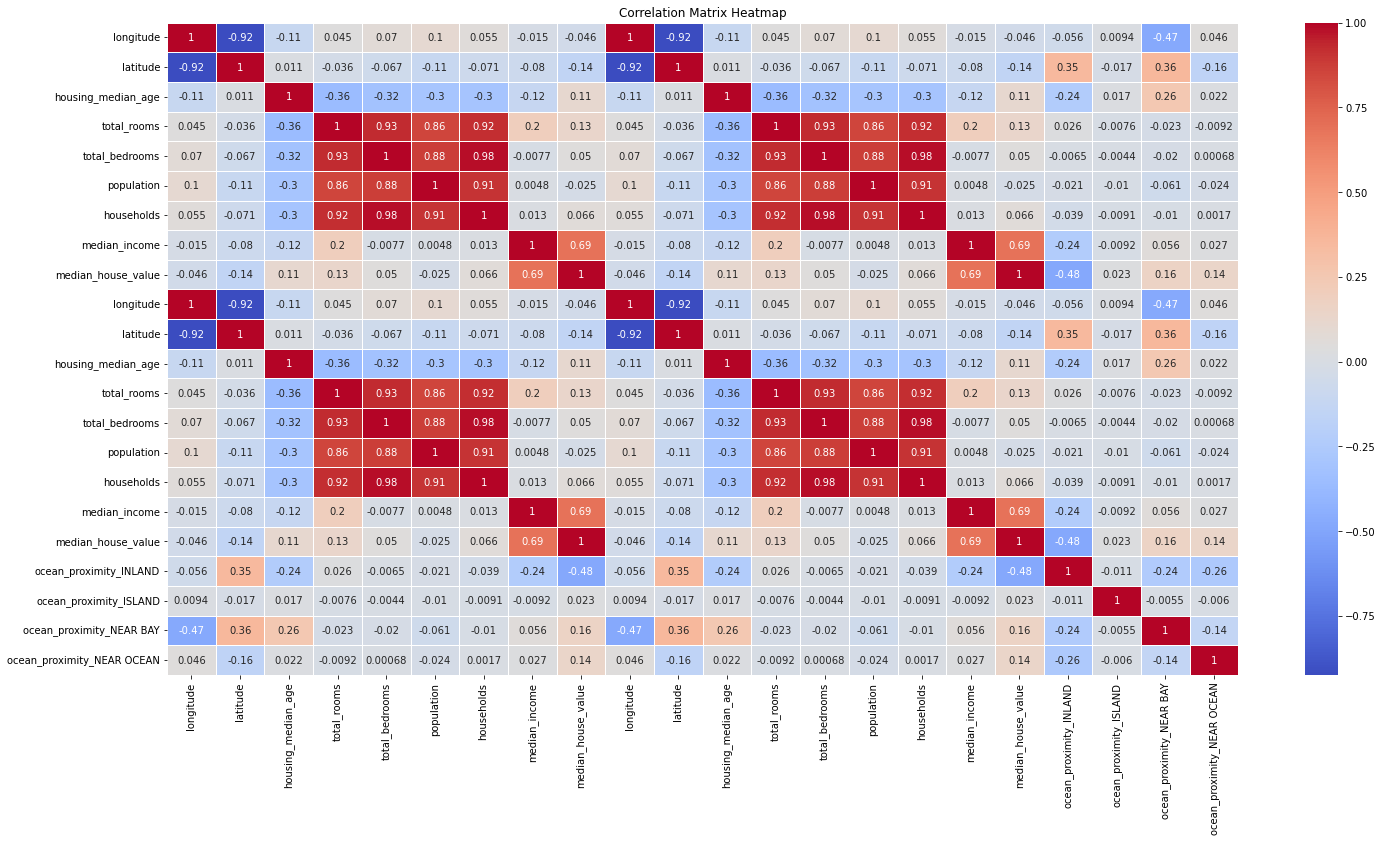

In [49]:
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)


In [8]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
med_ae = median_absolute_error(Y_test, y_pred)
evs = explained_variance_score(Y_test, y_pred)

In [9]:
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Median Absolute Error: ${med_ae:,.2f}")
print(f"Explained Variance Score: {evs:.2f}")

Mean Absolute Error (MAE): $50,670.74
Mean Squared Error (MSE): $4,908,476,721.16
R-squared (R²): 0.63
Median Absolute Error: $38,377.26
Explained Variance Score: 0.63


In [10]:
print("\nModel Evaluation:")
print("The Mean Absolute Error (MAE) indicates the average absolute difference between the predicted and actual house prices.")
print("The Mean Squared Error (MSE) gives more weight to larger errors, indicating the average squared difference between the predicted and actual house prices.")
print("The R-squared (R²) value shows how well the model explains the variance in the actual house prices. A value closer to 1 indicates a better fit.")
print("The Median Absolute Error provides the median of the absolute differences between the predicted and actual prices, which is less sensitive to outliers compared to MAE.")
print("The Explained Variance Score indicates the proportion of variance explained by the model, with values closer to 1 indicating a better model.")


Model Evaluation:
The Mean Absolute Error (MAE) indicates the average absolute difference between the predicted and actual house prices.
The Mean Squared Error (MSE) gives more weight to larger errors, indicating the average squared difference between the predicted and actual house prices.
The R-squared (R²) value shows how well the model explains the variance in the actual house prices. A value closer to 1 indicates a better fit.
The Median Absolute Error provides the median of the absolute differences between the predicted and actual prices, which is less sensitive to outliers compared to MAE.
The Explained Variance Score indicates the proportion of variance explained by the model, with values closer to 1 indicating a better model.


In [11]:
print("\nBased on these metrics:")
print(f"A Mean Absolute Error (MAE) of ${mae:,.2f} suggests that, on average, the model's predictions are ${mae:,.2f} away from the actual prices.")
print(f"A Mean Squared Error (MSE) of ${mse:,.2f} indicates the average of the squared differences between the predicted and actual prices, which penalizes larger errors more.")
print(f"An R-squared (R²) value of {r2:.2f} means that {r2*100:.2f}% of the variance in house prices is explained by the model.")
print(f"A Median Absolute Error of ${med_ae:,.2f} shows that half of the errors are below ${med_ae:,.2f}, indicating the typical error magnitude.")
print(f"An Explained Variance Score of {evs:.2f} suggests that {evs*100:.2f}% of the variance in the data is captured by the model.")


Based on these metrics:
A Mean Absolute Error (MAE) of $50,670.74 suggests that, on average, the model's predictions are $50,670.74 away from the actual prices.
A Mean Squared Error (MSE) of $4,908,476,721.16 indicates the average of the squared differences between the predicted and actual prices, which penalizes larger errors more.
An R-squared (R²) value of 0.63 means that 62.54% of the variance in house prices is explained by the model.
A Median Absolute Error of $38,377.26 shows that half of the errors are below $38,377.26, indicating the typical error magnitude.
An Explained Variance Score of 0.63 suggests that 62.55% of the variance in the data is captured by the model.


In [12]:
from sklearn.ensemble import RandomForestRegressor


In [13]:
rf = RandomForestRegressor(random_state=42)


In [14]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [15]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [16]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [17]:
best_rf = grid_search.best_estimator_


In [18]:
y_pred = best_rf.predict(X_test)


In [20]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
med_ae = median_absolute_error(Y_test, y_pred)
evs = explained_variance_score(Y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Median Absolute Error: ${med_ae:,.2f}")
print(f"Explained Variance Score: {evs:.2f}")


Mean Absolute Error (MAE): $31,447.06
Mean Squared Error (MSE): $2,378,261,530.83
R-squared (R²): 0.82
Median Absolute Error: $18,985.05
Explained Variance Score: 0.82
